In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

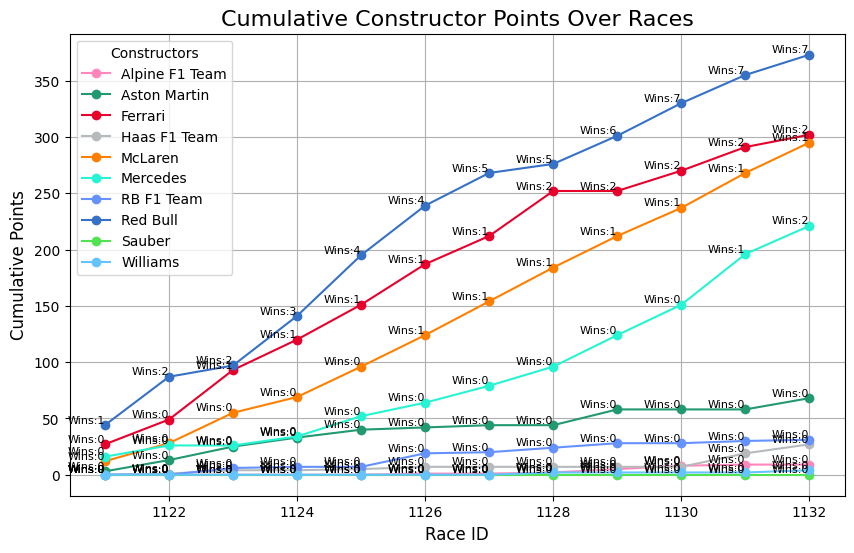

In [32]:
races_df = pd.read_csv('datasets/races.csv')
races_df = races_df[races_df['year'] == 2024][['raceId', 'round', 'date', 'name']] # get the races for the 2024 season

constructor_standings_df = pd.read_csv('datasets/constructor_standings.csv')
constructor_standings_df = constructor_standings_df[constructor_standings_df['raceId'].isin(races_df['raceId'])].drop(columns='constructorStandingsId')

constructors_df = pd.read_csv('datasets/constructors.csv')
constructors_df = constructors_df[constructors_df['constructorId'].isin(constructor_standings_df['constructorId'])]
constructors_df.drop(columns=['constructorRef', 'nationality', 'url'], inplace=True)


constructor_standings_df = pd.merge(constructor_standings_df, constructors_df, on='constructorId')
constructor_standings_df.drop(columns=['constructorId', 'positionText'], inplace=True)

constructor_standings_df.sort_values(by=['raceId', 'position'], inplace=True)

team_colors = {
    'McLaren': '#FF8000',
    'Mercedes': '#27F4D2',
    'Red Bull': '#3671C6',
    'Ferrari': '#E8002D',
    'Alpine F1 Team': '#FF87BC',
    'RB F1 Team': '#6692FF',
    'Aston Martin': '#229971',
    'Williams': '#64C4FF',
    'Sauber': '#52E252',
    'Haas F1 Team': '#B6BABD'
}

# Plotting cumulative points over races
plt.figure(figsize=(10, 6))
for constructor_name, group in constructor_standings_df.groupby('name'):
    plt.plot(
        group['raceId'], 
        group['points'], 
        marker='o', 
        label=constructor_name,
        color=team_colors[constructor_name]
    )
    # Annotating the plot with position and wins
    for i, row in group.iterrows():
        plt.text(
            row['raceId'], 
            row['points'], 
            f"Wins:{row['wins']}", 
            fontsize=8,
            ha='right', 
            va='bottom'
        )

plt.title("Cumulative Constructor Points Over Races", fontsize=16)
plt.xlabel("Race ID", fontsize=12)
plt.ylabel("Cumulative Points", fontsize=12)
plt.legend(title="Constructors")
plt.grid()
plt.show()

c:\Users\astal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\astal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\astal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\astal\AppData\Local\Programs\Python\Python312\Lib

Forecasted Points:  12    397.077367
13    420.918685
14    444.526270
15    467.902413
16    491.049383
17    513.969426
18    536.664768
19    559.137611
20    581.390136
21    603.424504
22    625.242853
23    646.847301
Name: predicted_mean, dtype: float64
Confidence Interval:      lower points  upper points
12    376.708645    417.446088
13    388.296900    453.540470
14    399.839063    489.213478
15    410.799374    525.005452
16    421.036963    561.061803
17    430.515228    597.423625
18    439.234394    634.095142
19    447.209331    671.065891
20    454.460836    708.319436
21    461.011834    745.837174
22    466.885619    783.600088
23    472.105026    821.589577
Forecasted Points:  12    318.550489
13    334.816052
14    350.801593
15    366.511934
16    381.951812
17    397.125884
18    412.038725
19    426.694834
20    441.098628
21    455.254453
22    469.166577
23    482.839196
Name: predicted_mean, dtype: float64
Confidence Interval:      lower points  upper points


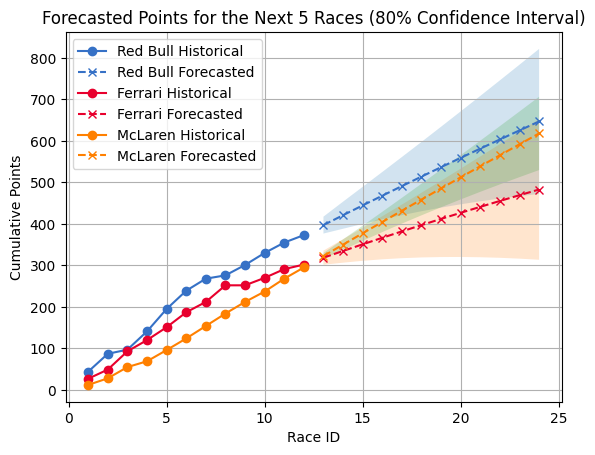

In [62]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

top_teams_list = ['Red Bull', 'Ferrari', 'McLaren']
top_teams_standings_df = constructor_standings_df[constructor_standings_df['name'].isin(top_teams_list)][['raceId', 'points', 'name']]
top_teams_standings_df['raceId'] = top_teams_standings_df['raceId'] - 1120

for team in top_teams_list:
    team_df = top_teams_standings_df[top_teams_standings_df['name'] == team]
    team_df = team_df.set_index('raceId')

    model = ARIMA(team_df['points'], order=(1,1,1))
    model_fit = model.fit()
    forecast_result = model_fit.get_forecast(steps=12)
    forecast = forecast_result.predicted_mean
    stderr = forecast_result.se_mean
    conf_int = forecast_result.conf_int(alpha=0.20)  # 80% confidence interval

    print("Forecasted Points: ", forecast)
    print("Confidence Interval: ", conf_int)

    # Plot the historical data (points) for the team
    plt.plot(team_df.index, team_df['points'], label=f'{team} Historical', linestyle='-', marker='o',color=team_colors[team])

    # Plot the forecasted points for the team
    future_raceIds = range(team_df.index[-1] + 1, team_df.index[-1] + 13)
    plt.plot(future_raceIds, forecast, label=f'{team} Forecasted', linestyle='--', marker='x',color=team_colors[team])

    # Plot the confidence intervals
    plt.fill_between(future_raceIds, conf_int.iloc[:, 0], conf_int.iloc[:, 1], alpha=0.2)

# Add labels and title
plt.xlabel('Race ID')
plt.ylabel('Cumulative Points')
plt.title('Forecasted Points for the Next 5 Races (80% Confidence Interval)')
plt.legend()
plt.grid(True)
plt.show()
